In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


In [2]:

# read in data as a numpy array 
data = np.loadtxt('alpha_beta_U_525.csv', delimiter=',')

vel = data[:,0]
alpha = data[:,1]
beta = data[:,2]

"""
# add a top row headers
df.columns = ['v','alpha', 'beta']
vel = df['v']
alpha = df['alpha']
beta = df['beta']
data.shape
"""

"\n# add a top row headers\ndf.columns = ['v','alpha', 'beta']\nvel = df['v']\nalpha = df['alpha']\nbeta = df['beta']\ndata.shape\n"

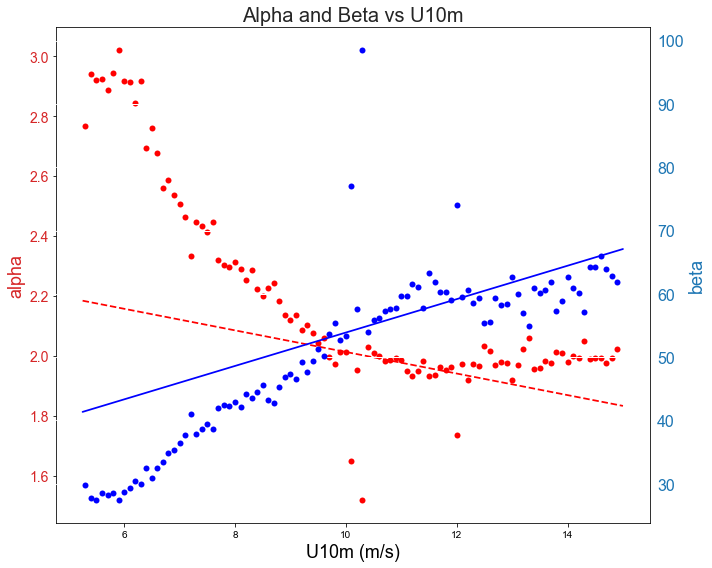

In [3]:
U_fine = np.linspace(5.25, 15, 100)
alpha_fine = -0.036*U_fine+2.3736
beta_fine = 2.6376*U_fine+27.5125

# plot with 2 y axis one for alpha and one for beta
fig, ax1 = plt.subplots(figsize=(10, 8))

# plt style seaborn
plt.style.use('seaborn')

color = 'tab:red'
ax1.set_xlabel('U10m (m/s)',fontsize = 18)
ax1.set_ylabel('alpha', color=color,fontsize = 18)
ax1.plot(vel, alpha,'r.',markersize = 12, label = 'alpha')
ax1.plot(U_fine, alpha_fine, 'r--', label = 'alpha fit')
ax1.tick_params(axis='y', labelcolor=color)
plt.yticks(fontsize = 14)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('beta', color=color,fontsize = 18)  # we already handled the x-label with ax1
ax2.plot(vel, beta, 'b.',markersize = 12, label = 'beta')
ax2.plot(U_fine, beta_fine, 'b-', label = 'beta fit')
ax2.tick_params(axis='y', labelcolor=color)

# set font size for ticks and labels
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title('Alpha and Beta vs U10m', fontsize = 20)



fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()




Linear fit: alpha = -0.09644419935410521 * U10m + 3.181151617499895
Exponential fit: alpha = 11.476828387594873 * exp(- 0.4257589214133048 * U10m) + 1.9117989028720515
R-squared for linear fit: 0.7129848869651662
R-squared for exponential fit: 0.9425611417247859


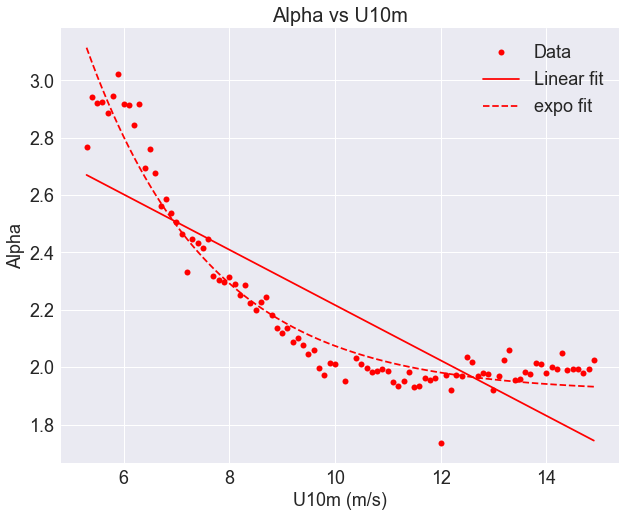

[11.47682839  0.42575892  1.9117989 ]


In [23]:
# new fit for alpha and beta

alpha_new = alpha[alpha>1.7]
U_new_1 = vel[alpha>1.7]

# fit a linear line to the data
m, b = np.polyfit(U_new_1, alpha_new, 1)

# exponential fit to the data   
def expo_fit(x, a, b, c):
    return a*np.exp(-b*x) + c

# fit the data to the function
popt, pcov = curve_fit(expo_fit, U_new_1, alpha_new, p0=(2, 0.1, 1))

# stats on both linear and exponential fit which is better
print('Linear fit: alpha =', m, '* U10m +', b)
print('Exponential fit: alpha =', popt[0], '* exp(-', popt[1], '* U10m) +', popt[2])

# calculate the r-squared value for both fits
residuals = alpha_new - (m*U_new_1 + b)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((alpha_new-np.mean(alpha_new))**2)
r_squared = 1 - (ss_res / ss_tot)
print('R-squared for linear fit:', r_squared)

residuals = alpha_new - expo_fit(U_new_1, *popt)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((alpha_new-np.mean(alpha_new))**2)
r_squared = 1 - (ss_res / ss_tot)
print('R-squared for exponential fit:', r_squared)





plt.figure(figsize=(10, 8))
# plot the data and the fit
plt.plot(U_new_1, alpha_new, 'r.', label='Data',markersize = 12)
plt.plot(U_new_1, m*U_new_1 + b, 'r-', label='Linear fit')
plt.plot(U_new_1, expo_fit(U_new_1, *popt), 'r--', label='expo fit')

plt.xlabel('U10m (m/s)', fontsize = 18)
plt.ylabel('Alpha', fontsize = 18)
plt.title('Alpha vs U10m', fontsize = 20)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.legend(fontsize = 18)
plt.show()

# output coefficinets of exponential fit
print(popt)

alpha_model = expo_fit(vel, *popt)



Linear fit: beta = 3.8789115609660487 * U10m + 10.417607908528634
Logarithmic fit: beta = 37.97555263468295 * log( 0.3813384098847975 * U10m)
R-squared for linear fit: 0.887866857240744
R-squared for logarithmic fit: 0.9372168722841346


/Users/ananth/miniconda3/envs/tensorflow_env/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in log
  from ipykernel import kernelapp as app


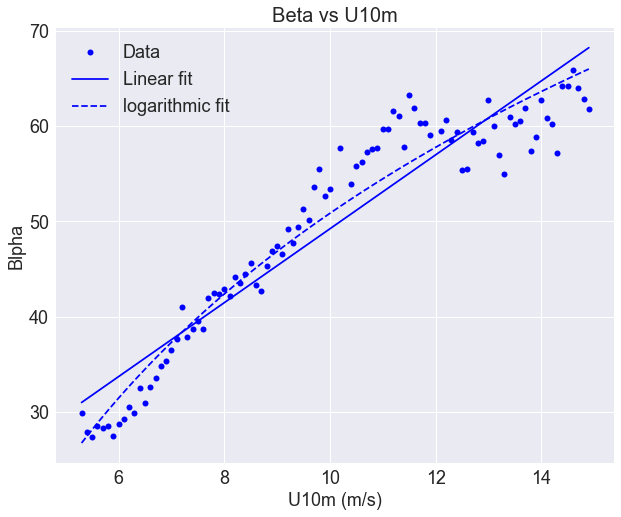

[37.97555263  0.38133841]


In [24]:
# new fit for alpha and beta

beta_new = beta[beta<70]
U_new_1 = vel[beta<70]

# fit a linear line to the data
m, b = np.polyfit(U_new_1, beta_new, 1)


# fit logaritmic function to the data
def log_fit(x, a, b, c):
    return a*np.log(b*x) + c

def log_fit_2(x,a,b):
    return a*np.log(b*x)

# fit the data to the function
popt, pcov = curve_fit(log_fit_2, U_new_1, beta_new, p0=(0.1, 0.1))

# stats on both linear and exponential fit which is better
print('Linear fit: beta =', m, '* U10m +', b)
print('Logarithmic fit: beta =', popt[0], '* log(', popt[1], '* U10m)')


# calculate the r-squared value for both fits
residuals = beta_new - (m*U_new_1 + b)

ss_res = np.sum(residuals**2)
ss_tot = np.sum((beta_new-np.mean(beta_new))**2)
r_squared = 1 - (ss_res / ss_tot)
print('R-squared for linear fit:', r_squared)

residuals = beta_new - log_fit_2(U_new_1, *popt)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((beta_new-np.mean(beta_new))**2)
r_squared = 1 - (ss_res / ss_tot)
print('R-squared for logarithmic fit:', r_squared)


plt.figure(figsize=(10, 8))
# plot the data and the fit
plt.plot(U_new_1, beta_new, 'b.', label='Data',markersize = 12)
plt.plot(U_new_1, m*U_new_1 + b, 'b-', label='Linear fit')
plt.plot(U_new_1, log_fit_2(U_new_1, *popt), 'b--', label='logarithmic fit')

plt.xlabel('U10m (m/s)', fontsize = 18)
plt.ylabel('Blpha', fontsize = 18)
plt.title('Beta vs U10m', fontsize = 20)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.legend(fontsize = 18)
plt.show()

# output coefficinets of exponential fit
print(popt)

beta_model = log_fit_2(vel, *popt)




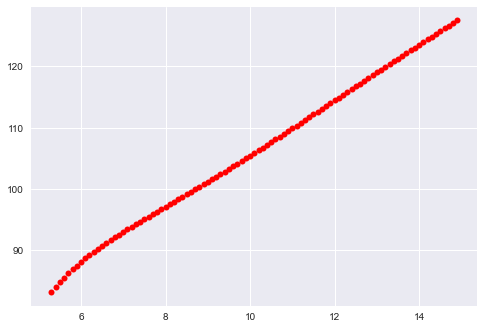

In [26]:
mean_diam = alpha_model * beta_model
plt.plot(vel,mean_diam,'r.',markersize = 12)

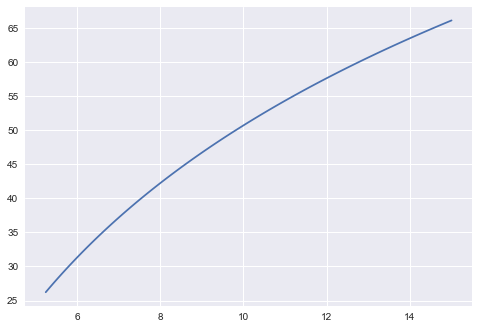

In [20]:
l = np.linspace(5.25, 15, 100)
fit = 37.97* np.log(0.38* l)

#fit = popt[0]*np.log(popt[1]*l) + popt[2]
plt.plot(l,fit)